## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'<br>

# 3. 구 별 등록인구 분석
### 서울시 내 각 구 별로 등록된 인구를 분석합니다.

In [4]:
# 필요 라이브러리를 설치합니다.
#%pip install pandas seaborn

## 데이터 안내

[데이터 파일명]
* 3. seoul_people.csv

[데이터 정보]
* 서울시 주민등록 데이터

[데이터 컬럼 정보]
* 한국인, 등록 외국인, 합계, 세대수, 고령인구수

# 3.1.데이터 불러오기

#### [3.1.1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '3. seoul_people.csv'파일을 'seoul_people' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 '\t' 입니다
        * 인코더를 사용해 주세요
    * 데이터를 불러올 때 오류가 발생한다면, 오류에 대해 직접 검색하여 해결해보세요.

In [5]:
# 아래에 코드를 작성하고 결과를 확인합니다.
import pandas as pd
import numpy as np

seoul_people=pd.read_csv("3. seoul_people.csv",sep='\t',encoding='euc-kr')
seoul_people.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742


In [6]:
# 행 이름 변경
seoul_people.rename(columns={'인구.1':'남성인구','인구.2':'여성인구','인구.3':'한국인','인구.4':'한국인남성','인구.5':'한국인여성',
                             '인구.6':'등록외국인','인구.7':'외국인남성','인구.8':'외국인여성'},inplace=True)
# 맨 처음 행 이름 제거(합계 열 제거)
seoul_people=seoul_people.drop(index=[0,1,2])
seoul_people=seoul_people.reset_index(drop=True)

In [7]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_people.shape

(25, 14)

# 3.2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [3.2.1] 기본 정보 확인하기
* 'seoul_people' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head', 'tail' 등 전부 활용해 보세요.

In [8]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_people.describe()

,기간,자치구,세대,인구,남성인구,여성인구,한국인,한국인남성,한국인여성,등록외국인,외국인남성,외국인여성,세대당인구,65세이상고령자
count,25,25,25,25,25,25,25,25,25,25,25,25,25,25
unique,1,25,25,25,25,25,25,25,25,25,25,25,22,25
top,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,2,28064
freq,25,1,1,1,1,1,1,1,1,1,1,1,2,1


In [9]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        25 non-null     object
 1   자치구       25 non-null     object
 2   세대        25 non-null     object
 3   인구        25 non-null     object
 4   남성인구      25 non-null     object
 5   여성인구      25 non-null     object
 6   한국인       25 non-null     object
 7   한국인남성     25 non-null     object
 8   한국인여성     25 non-null     object
 9   등록외국인     25 non-null     object
 10  외국인남성     25 non-null     object
 11  외국인여성     25 non-null     object
 12  세대당인구     25 non-null     object
 13  65세이상고령자  25 non-null     object
dtypes: object(14)
memory usage: 2.9+ KB


In [10]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_people.head()

,기간,자치구,세대,인구,남성인구,여성인구,한국인,한국인남성,한국인여성,등록외국인,외국인남성,외국인여성,세대당인구,65세이상고령자
0,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
1,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
2,2022.1/4,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2,39461
3,2022.1/4,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
4,2022.1/4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604


In [11]:
# 아래에 코드를 작성하고 결과를 확인합니다.
seoul_people.tail()

,기간,자치구,세대,인구,남성인구,여성인구,한국인,한국인남성,한국인여성,등록외국인,외국인남성,외국인여성,세대당인구,65세이상고령자
20,2022.1/4,관악구,279353,500336,250450,249886,486375,244409,241966,13961,6041,7920,1.74,80686
21,2022.1/4,서초구,169895,413677,197665,216012,409823,195806,214017,3854,1859,1995,2.41,61404
22,2022.1/4,강남구,234612,537338,257096,280242,532577,254866,277711,4761,2230,2531,2.27,79575
23,2022.1/4,송파구,285106,668261,321963,346298,662607,319407,343200,5654,2556,3098,2.32,99854
24,2022.1/4,강동구,201926,465097,227891,237206,461300,226203,235097,3797,1688,2109,2.28,75477


#### [3.2.2] 원하는 데이터 형태로 저장하기

* head, tail 등을 살펴본 결과를 토대로 header 값을 적절히 지정하여 데이터를 다시 불러오고 필요한 컬럼만 저장하세요

In [12]:
#read_csv 재실행. 단, header값을 적절히 지정


In [13]:
# 다시 불러온 데이터프레임에서 여러분 각자가 사용하고자 하는 컬럼만 가져오세요.


In [14]:
# 해당 데이터프레임을 csv 파일로 저장하세요.
seoul_people.to_csv("df_seoul_people.csv")

# 3.3.데이터 분석하기
+ 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별하세요.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [15]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

#### [3.3.1] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [16]:
seoul_people=seoul_people.astype({'세대':'int','인구':'int','남성인구':'int','여성인구':'int',
                                  '한국인':'int','한국인남성':'int','한국인여성':'int',
                                  '등록외국인':'int','외국인남성':'int','외국인여성':'int',
                                  '세대당인구':'float','65세이상고령자':'int'})
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        25 non-null     object 
 1   자치구       25 non-null     object 
 2   세대        25 non-null     int32  
 3   인구        25 non-null     int32  
 4   남성인구      25 non-null     int32  
 5   여성인구      25 non-null     int32  
 6   한국인       25 non-null     int32  
 7   한국인남성     25 non-null     int32  
 8   한국인여성     25 non-null     int32  
 9   등록외국인     25 non-null     int32  
 10  외국인남성     25 non-null     int32  
 11  외국인여성     25 non-null     int32  
 12  세대당인구     25 non-null     float64
 13  65세이상고령자  25 non-null     int32  
dtypes: float64(1), int32(11), object(2)
memory usage: 1.8+ KB


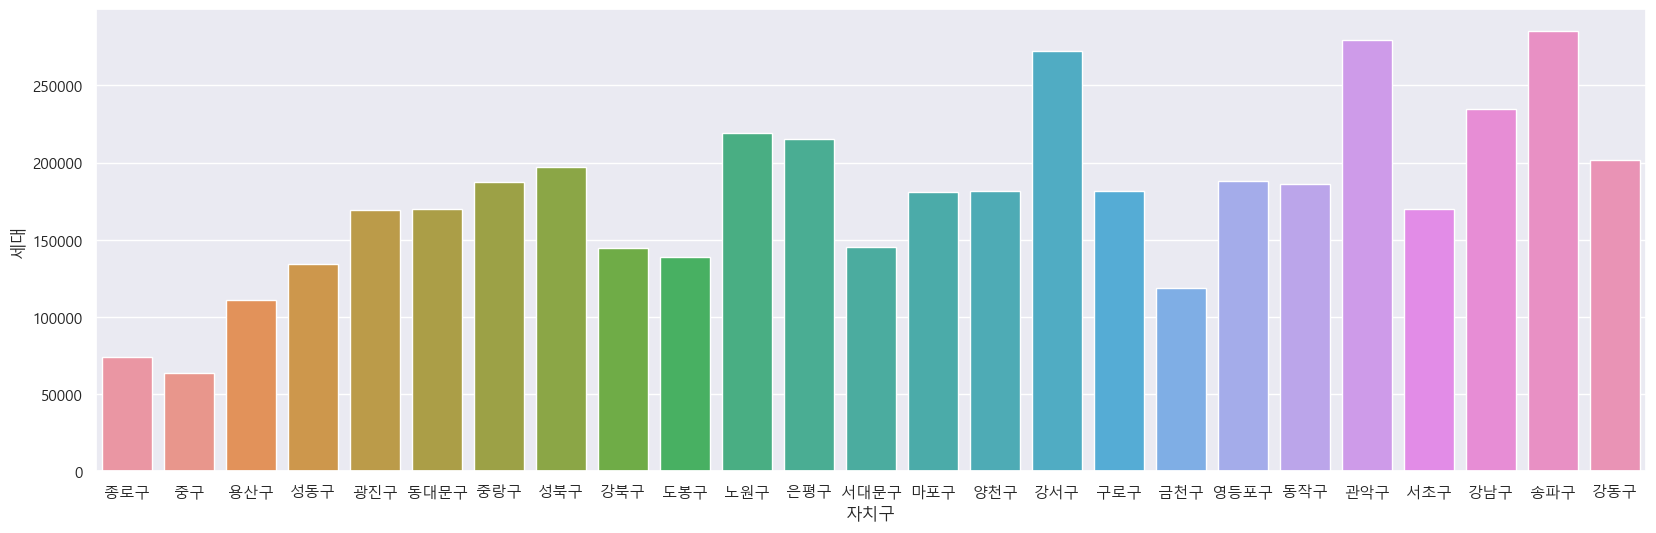

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,6))
sns.barplot(x='자치구',y='세대',data=seoul_people)
plt.show()

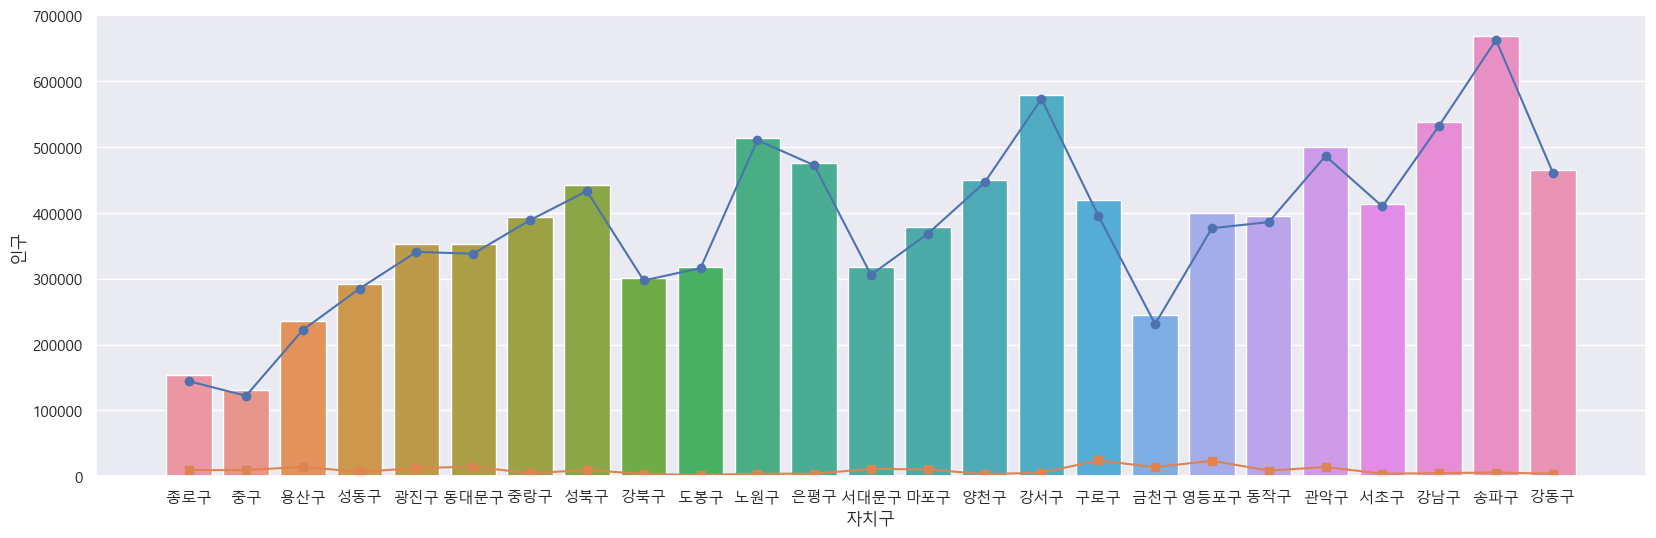

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,6))
sns.barplot(x='자치구',y='인구',data=seoul_people)
plt.plot(seoul_people['자치구'],seoul_people['한국인'],marker='o')
plt.plot(seoul_people['자치구'],seoul_people['등록외국인'],marker='s')
plt.show()

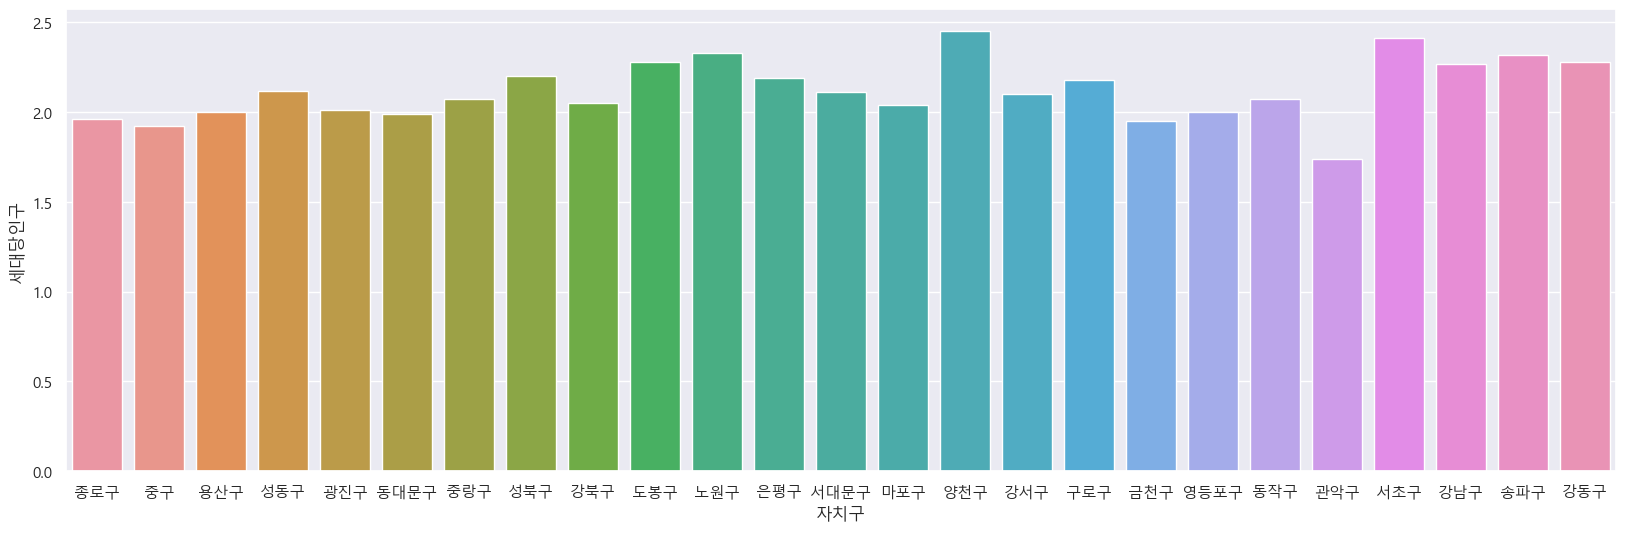

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,6))
sns.barplot(x='자치구',y='세대당인구',data=seoul_people)
plt.show()

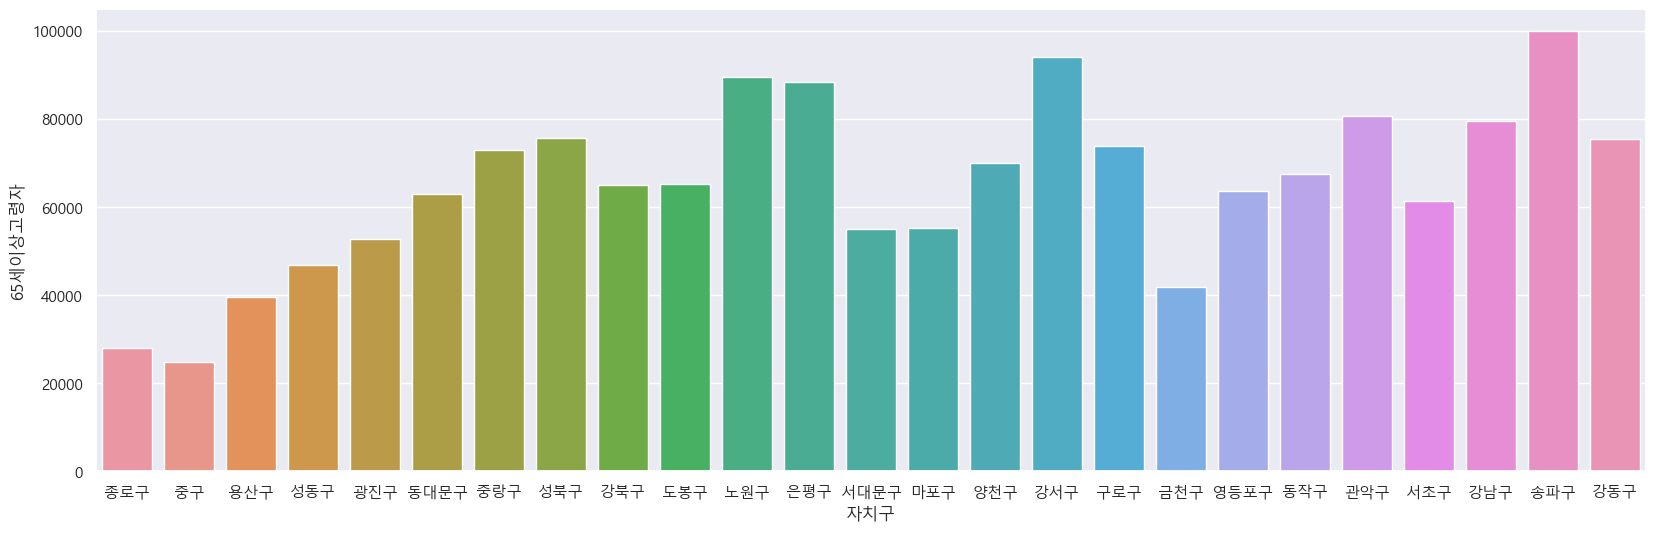

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,6))
sns.barplot(x='자치구',y='65세이상고령자',data=seoul_people)
plt.show()

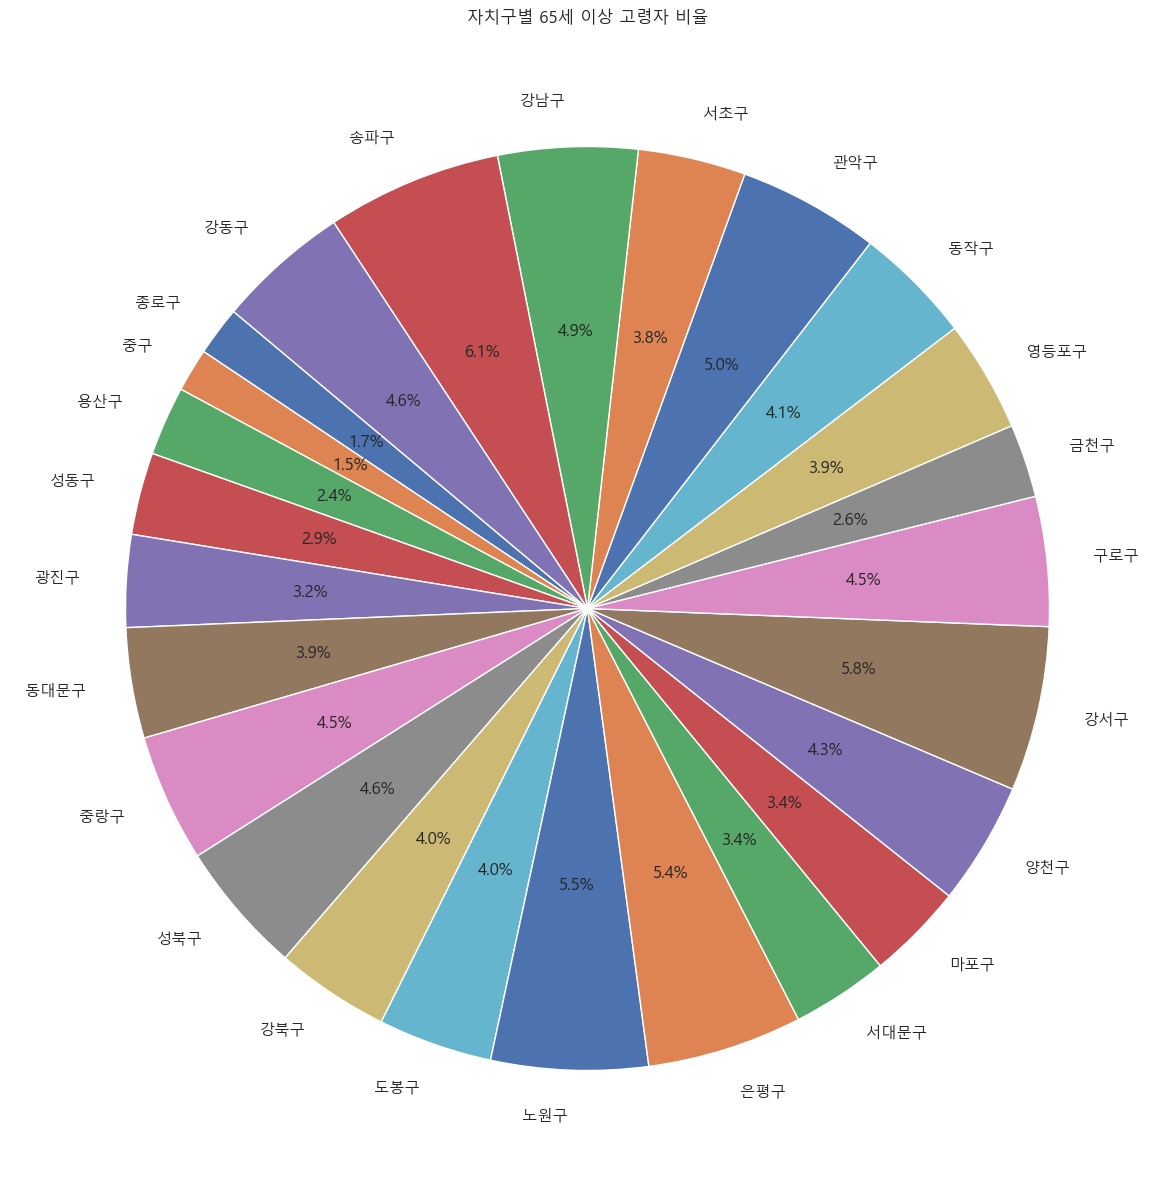

In [26]:
plt.figure(figsize=(15,15))
plt.pie(seoul_people['65세이상고령자'], labels=seoul_people['자치구'], autopct='%1.1f%%', startangle=140)
plt.title('자치구별 65세 이상 고령자 비율')
plt.show()

In [24]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 강서구, 관악고, 송파구의 세대 수가 많다.
# 2. 양천구, 서초구는 세대당 인구수가 많다.
# 3. 송파구에 고령자 수가 가장 많다.

---